# HOMEWORK 1: PYTHON SKILLS
This homework is about the python skills needed for this course.

1. Copy this notebook to your Google drive.
1. Answer the questions.
1. Your response to the homework is a link to your Google drive. You should enable write permissions for jflynn56@uw.edu, jlheller@uw.edu, and hsauro@uw.edu.

Colab setup. # test

In [6]:
!apt-get install libncurses5
%pip install -q tellurium==2.2.8

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


You have to **restart the runtime any time you replace an old version of a package with a new version**, and we just replaced the old version of numpy with a newer one. You restart the runtime by ``Runtime>Restart and run all``

Run the following to handle legacy versions.

In [7]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import tellurium as te

# Questions
1. (5 pts) Create an Antimony model that consists of a linear chain of 5 species. The reaction rate for $S_k \rightarrow S_{k+1}$ is $\frac{S_k}{k}$ for $1 \leq k \leq5$. There are two boundary reactions: (i) $S_1$ is synthesized at the rate 1 and (ii) $S_5$ is degraded at a rate $1/5$.  Run the model. Plot the time course of the 5 species. Choose the simulation duration and number of points so that the relationships between species concentrations is clearly displayed.
1. (5 pts) Construct a figure with 10 scatter plots organized as follows.
    1. For each plot, the x-value is $S_k$ at time $t$ and the y-value is $S_{k+1}$ at time $t$.
    1. The columns are $S_k$, for $k \in \{1, 2, 3, 4}$. The rows are $k \in \{2, 3, 4, 5\}$. This means that the resulting figure is a half square or triangle. (Look at matplotlib.gridspec.)
    1. Explain the shape of the curves when the $x$ and $y$ variables differ. Specifically, explain why the $y$ value is zero for an extended period before it increases abruptly. Use the time series plots in Q1 in your explanation.
1. (5 pts) This is a search problem. For the reaction network in (1), add the degradation reaction $S_2 \rightarrow ∅$ at a rate $S_2$. Also, add the synthesis reaction $\rightarrow S_4$ at the rate $kk$. Find the value of $kk$ such that the steady state value of $S_5$ in this network is the same as its value in the original network. Plot the time course of the network with the value of $kk$ that you found.


# Q1 Solution

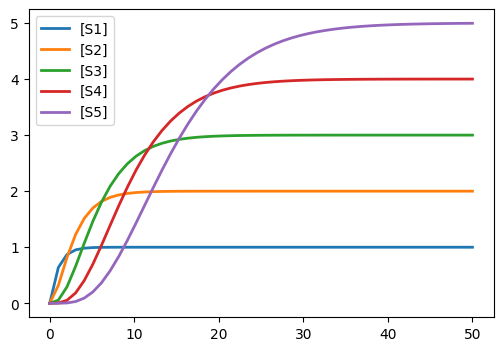

In [33]:
model = """
-> S1; k0;
S1 -> S2; k1*S1
S2 -> S3; k2*S2;
S3 -> S4; k3*S3;
S4 -> S5; k4*S4;
S5 ->; k5*S5;


k0 = 1;
k1 = 1;
k2 = 1/2;
k3 = 1/3;
k4 = 1/4;
k5 = 1/5;


"""
rr = te.loada(model)
data = rr.simulate(0, 50, 50)
rr.plot()

# Q2 Solution

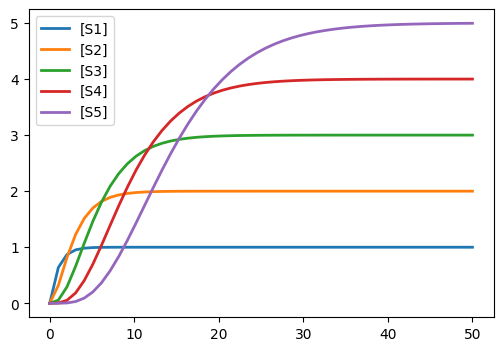

In [62]:
model = """
-> S1; k0;
S1 -> S2; k1*S1
S2 -> S3; k2*S2;
S3 -> S4; k3*S3;
S4 -> S5; k4*S4;
S5 ->; k5*S5;


k0 = 1;
k1 = 1;
k2 = 1/2;
k3 = 1/3;
k4 = 1/4;
k5 = 1/5;


"""
rr = te.loada(model)
data = rr.simulate(0, 50, 50)
rr.plot()

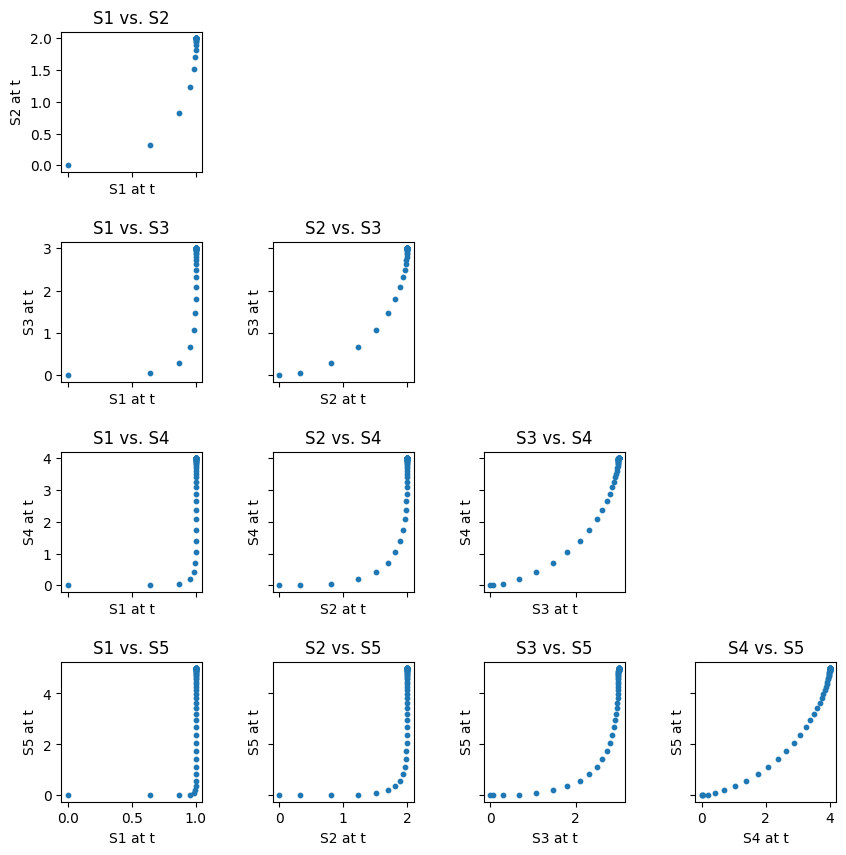

In [69]:
import matplotlib.pyplot as plt

#Data from the simulation
time_points = data[:, 0]
S1_data = data[:, 1]
S2_data = data[:, 2]
S3_data = data[:, 3]
S4_data = data[:, 4]
S5_data = data[:, 5]

#Grid of Subplots
fig, axs = plt.subplots(4, 4, figsize=(10, 10), sharex='col', sharey='row')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

#Rows and columns for the subplots
rows = [2, 3, 4, 5]
cols = [1, 2, 3, 4]

# Create scatter plots for each combination of rows and columns
for i, row in enumerate(rows):
    for j, col in enumerate(cols):
        if col < row:
            # Extract the data for the current row and column
            x_data = eval(f'S{col}_data')
            y_data = eval(f'S{row}_data')

            # Create a scatter plot
            axs[i, j].scatter(x_data, y_data, label=f'S{col} vs. S{row}', s=10)
            axs[i, j].set_xlabel(f'S{col} at t')
            axs[i, j].set_ylabel(f'S{row} at t')
            axs[i, j].set_title(f'S{col} vs. S{row}')
            
        else:
            axs[i, j].axis('off')  # Hide the upper right corner

plt.show()



The curve where the y-variable remains zero for an extended period before abruptly increasing suggests a rate-limiting step in the reaction network. This means that at least one of the reactions in the network have very slow reaction rates, resulting in the accumulation of intermediates or products at low concentrations. Once the threshold is reached, there is a sudden increase in the y-variable as the rate-limiting step is overcome, and the reactions proceed more rapidly to then reaching a new equilibrium.

In other words, rate is getting smaller, it takes more time to get to the jump. Takes longer to get to the steady state due to the slower reaction rate of downstream reactions.  

# Q3 Solution

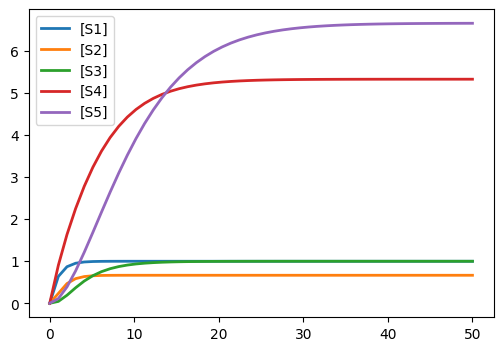

In [104]:

# Define the original model
model = """
-> S1; k0;
S1 -> S2; k1*S1
S2 -> S3; k2*S2;
S2 ->; S2
S3 -> S4; k3*S3;
-> S4; kk
S4 -> S5; k4*S4;
S5 ->; k5*S5;

kk = 1;
k0 = 1;
k1 = 1;
k2 = 1/2;
k3 = 1/3;
k4 = 1/4;
k5 = 1/5;
"""

# Load the model
rr = te.loada(model)
data = rr.simulate(0, 50, 50)
rr.plot()


In [102]:
def find_kk_for_steady_state_value(model, species_name, desired_val, parameter_name, initial_val=1, max_iterations=100, tolerance=0.001):
    # Load the model
    rr = te.loada(model)
    
    # Initialize parameters
    parameter_val = initial_val
    step_rate = 0.1  # Adjusted step rate
    
    for iteration in range(max_iterations):
        # Set the parameter value
        rr[parameter_name] = parameter_val
        
        # Simulate the model to steady state
        rr.steadyState()
        
        # Get the steady-state value of the species
        species_value = rr[species_name]
        
        # Calculate the difference between the desired value and the actual species value
        diff = desired_val - species_value
        
        # Check if the difference is within tolerance
        if np.abs(diff) < tolerance:
            return parameter_val  # Found a suitable value
        
        # Update the parameter value
        parameter_val += step_rate * diff
    
    return None  # Search did not converge


In [103]:
# model
original_model = """
-> S1; k0;
S1 -> S2; k1*S1
S2 -> S3; k2*S2;
S2 ->; S2
S3 -> S4; k3*S3;
-> S4; kk
S4 -> S5; k4*S4;
S5 ->; k5*S5;

kk = 1;
k0 = 1;
k1 = 1;
k2 = 1/2;
k3 = 1/3;
k4 = 1/4;
k5 = 1/5;
"""

# Specify the desired steady-state value of S5
desired_S5_value =  5 # Provide the desired value here

# Call the function to find the value of kk
found_kk_value = find_kk_for_steady_state_value(original_model, "S5", desired_S5_value, "kk")

# Print the found value of kk
print("kk value:", found_kk_value)


kk value: 0.6668294270833333


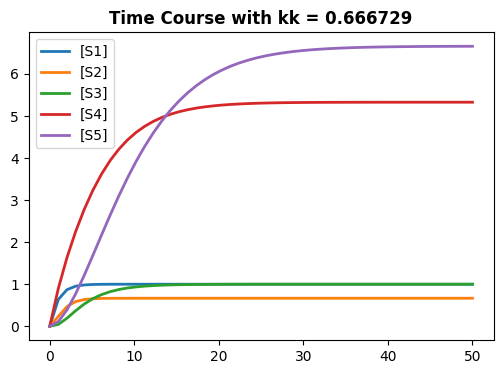

In [98]:
#  Adjusted model
adjusted_model = """
-> S1; k0;
S1 -> S2; k1*S1
S2 -> S3; k2*S2;
S2 ->; S2
S3 -> S4; k3*S3;
-> S4; kk
S4 -> S5; k4*S4;
S5 ->; k5*S5;

kk = 0.9986;  # Set the value of kk to the one you found
k0 = 1;
k1 = 1;
k2 = 1/2;
k3 = 1/3;
k4 = 1/4;
k5 = 1/5;
"""

rr = te.loada(adjusted_model)

# Time course plot
data = rr.simulate(0, 50, 50)
rr.plot(title="Time Course with kk = 0.666729")